## Import Libraries and Data

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_dark'



df = pd.read_csv('test_data/ETH-USD.csv')
print(df.shape)
df.head()

(2120, 7)


Date      Open      High       Low     Close  Adj Close     Volume
0  2015-08-08  2.793760  2.798810  0.714725  0.753325   0.753325   674188.0
1  2015-08-09  0.706136  0.879810  0.629191  0.701897   0.701897   532170.0
2  2015-08-10  0.713989  0.729854  0.636546  0.708448   0.708448   405283.0
3  2015-08-11  0.708087  1.131410  0.663235  1.067860   1.067860  1463100.0
4  2015-08-12  1.058750  1.289940  0.883608  1.217440   1.217440  2150620.0

## Goal and Data Description

We are going to use the 'ETH-USD' data set, which shows the:
1. Open
2. High
3. Low
4. Close 
5. Adj Close
6. Volume
<br>
per day for Ethereum prices from 2015 to present!
<br>

This dataset provides a timeline that goes from 2015 to present, and is comprehensive and well structured. 
<br>

https://www.kaggle.com/prahladmehandiratta/ethereum-historical-data

## EDA

### Creating the initial time series graphs

In [20]:
# Convert the 'Date' column to a datetime datatype and set it as the index
df['Date'] = pd.to_datetime(df.Date)
df.set_index(df.Date, inplace=True)

# Drop the Date column
df = df.drop(columns=['Date'], axis=1)

df.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2015-08-08  2.793760  2.798810  0.714725  0.753325   0.753325   674188.0
2015-08-09  0.706136  0.879810  0.629191  0.701897   0.701897   532170.0
2015-08-10  0.713989  0.729854  0.636546  0.708448   0.708448   405283.0
2015-08-11  0.708087  1.131410  0.663235  1.067860   1.067860  1463100.0
2015-08-12  1.058750  1.289940  0.883608  1.217440   1.217440  2150620.0

In [21]:
# Find missing values
df.isna().sum()

# There are very few missing values, so we will drop all of them
df = df.dropna()

In [22]:
# Check for duplicates in index
print(df.index.duplicated().sum())

# Check for duplicates in columns
print(df.duplicated().sum())

0
0


In [23]:
# Check how much of the data are duplicates overall
df[df.duplicated()==True].shape[0] / df.shape[0]

0.0

There are no duplicates in this data after we drop the rows with null values

In [24]:
df = df.drop_duplicates()
print(df.shape)
df.head()

(2116, 6)


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2015-08-08  2.793760  2.798810  0.714725  0.753325   0.753325   674188.0
2015-08-09  0.706136  0.879810  0.629191  0.701897   0.701897   532170.0
2015-08-10  0.713989  0.729854  0.636546  0.708448   0.708448   405283.0
2015-08-11  0.708087  1.131410  0.663235  1.067860   1.067860  1463100.0
2015-08-12  1.058750  1.289940  0.883608  1.217440   1.217440  2150620.0

Let's take a look at the time series.

In [25]:
# Import graph objects
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
for c in list(df.columns):
    fig.add_trace(go.Scatter(x=df.index, y=df[c], mode='lines', name=f'{c}'))
fig

Let's take a look at the histograms of the features of the series.

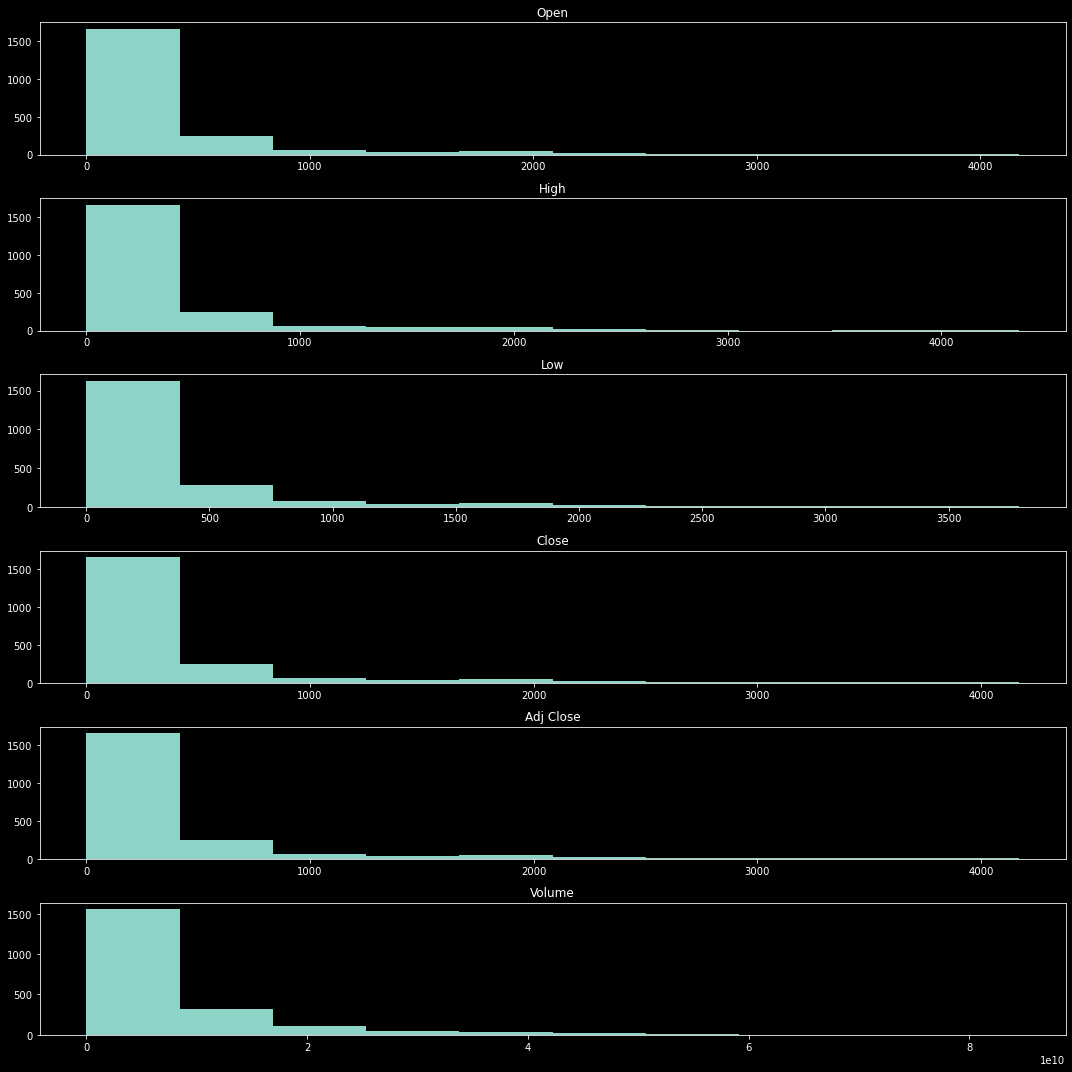

In [26]:
fig, ax = plt.subplots(6, figsize=(15,15))
for i, x in enumerate(df.columns):
    ax[i].hist(df[x])
    ax[i].set_title(f'{list(df.columns)[i]}')
plt.tight_layout()

All of the data seems to be heavily skewed to the left. Let's look into this further.

In [27]:
# Show value counts
for c in df.columns:
    print(c)
    print(df[c].value_counts())

Open
205.173996    2
333.519012    1
229.167694    1
134.786118    1
282.036285    1
             ..
360.312012    1
182.670380    1
465.973999    1
19.374599     1
1.375000      1
Name: Open, Length: 2115, dtype: int64
High
333.519012     1
239.006256     1
152.148270     1
10.834900      1
177.741730     1
              ..
3573.290039    1
215.908463     1
10.336200      1
11.726300      1
235.117996     1
Name: High, Length: 2116, dtype: int64
Low
11.776800      2
229.259460     1
868.450989     1
48.132301      1
1407.979248    1
              ..
104.194435     1
436.209015     1
205.927994     1
216.516251     1
2308.315186    1
Name: Low, Length: 2115, dtype: int64
Close
11.652800     2
11.951600     2
317.519012    1
459.940308    1
290.695984    1
             ..
12.053700     1
11.571300     1
321.514099    1
166.727127    1
51.250000     1
Name: Close, Length: 2114, dtype: int64
Adj Close
11.652800     2
11.951600     2
317.519012    1
459.940308    1
290.695984    1
        

In [28]:
# Check max values
for c in df.columns:
    print(c)
    print(max(df[c]))

Open
4174.635742
High
4362.350586
Low
3785.8486329999996
Close
4168.701172
Adj Close
4168.701172
Volume
84482912776.0


That max volume is in USD, and potentially makes sense depending on the time period it was recorded. Will investigate.

**Price**
<br>
The price column seems to show a steady rise over time, with a large rise during 2018 and then a sharp fall. After 2018, the price of Ethereum began to slowly rise, and then pick up some speed, peaking at just over $4000 in 2021, and then falling to a little over half of that value!
<br>

**Volume**
<br>
Volume shows a wide range of values, with some very large values. This could be attributed to the growing popularity of Ethereum, or possibly data entry error.
<br>

**Important Note**
<br>
It is important to mention that this time series of Ethereum prices encapsulates a time period when Ethereum experienced a meteoric rise in price, and then was hit with what is known as the biggest crash in Ethereum thus far. This is clear when we look at the time series graph! It went up more than 23,000% during the time period in 2018, and then dropped to about 1/7th of its peak price.


### Cleaned Graphs and Resampling

The original time series was very hard to interpret because the volume column has very large numbers that messed with the scale of the graph. In order to remedy this, we will plot the price data and the volume data seperately, and we will resample the Volume data in order

In [29]:
# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=df.index, y=df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=df, x=df.index, y=df['Volume'], title='Volume Data'))

The trends of each series for each column generally match each other quite well. This is good because it means we don't have any extreme outliers or periods of time where no data was recorded.

Let's resample the data

In [37]:
weekly_df = pd.DataFrame(df.resample('W').mean())
weekly_df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-08-09     1.749948     1.839310     0.671958     0.727611     0.727611   
2015-08-16     1.285889     1.564376     1.110131     1.414888     1.414888   
2015-08-23     1.351916     1.458024     1.241557     1.305936     1.305936   
2015-08-30     1.200140     1.254129     1.142806     1.196049     1.196049   
2015-09-06     1.315017     1.353179     1.259363     1.311231     1.311231   
...                 ...          ...          ...          ...          ...   
2021-05-02  2677.568150  2785.795375  2624.926130  2767.394287  2767.394287   
2021-05-09  3433.049909  3659.813790  3328.468506  3573.514370  3573.514370   
2021-05-16  3902.020612  4135.670689  3642.295794  3846.668248  3846.668248   
2021-05-23  2883.890625  3055.415946  2359.577462  2677.621128  2677.621128   
2021-05-30  2582.178589  2801.889649  2444.924377  2753.762939  2753.762939   

                  Volume  
Date                      
2015-08-09  6.031790e+05  
2015-08-16  2.689980e+06  
2015-08-23  1.759584e+06  
2015-08-30  9.157730e+05  
2015-09-06  7.468020e+05  
...                  ...  
2021-05-02  3.155241e+10  
2021-05-09  4.922785e+10  
2021-05-16  5.724989e+10  
2021-05-23  5.692025e+10  
2021-05-30  4.508006e+10  

[304 rows x 6 columns]

In [38]:
# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=weekly_df.index, y=weekly_df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=weekly_df, x=weekly_df.index, y=weekly_df['Volume'], title='Volume Data'))

In [39]:
monthly_df = pd.DataFrame(df.resample('M').mean())

# Plot the time series
fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Add traces
for c in col:
    fig.add_trace(go.Scatter(x=monthly_df.index, y=monthly_df[c], mode='lines', name=f'{c}'))
fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()
display(px.line(data_frame=monthly_df, x=monthly_df.index, y=monthly_df['Volume'], title='Volume Data'))

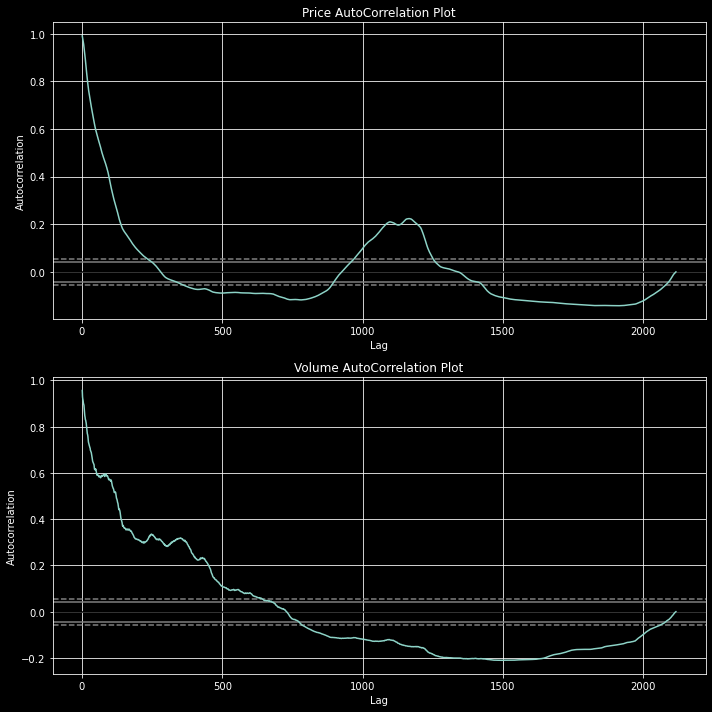

In [36]:
from pandas.plotting import autocorrelation_plot
fig, ax = plt.subplots(2, figsize=(10,10))
autocorrelation_plot(df['Open'], ax=ax[0])
ax[0].set_title('Price AutoCorrelation Plot')
autocorrelation_plot(df['Volume'], ax=ax[1])
ax[1].set_title('Volume AutoCorrelation Plot')

plt.tight_layout()

### Rolling Averages

In [64]:
# 7-day window

col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
data_7d_rol = df[col].rolling(window = 7, center = True).mean()
data_7d_rol = data_7d_rol.ffill()
px.line(data_7d_rol)

In [63]:
# 30-day window

col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
data_30d_rol = df[col].rolling(window = 30, center = True).mean()
data_30d_rol = data_30d_rol.ffill()
px.line(data_30d_rol)

In [62]:
# 90-day window
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
data_90d_rol = df[col].rolling(window = 90, center = True).mean()
data_90d_rol = data_90d_rol.ffill()
px.line(data_90d_rol)

In [65]:
# 90-day window
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']
data_365d_rol = df[col].rolling(window = 365, center = True).mean()
data_365d_rol = data_365d_rol.ffill()
px.line(data_365d_rol)


In [52]:
# Full compiled graph of 30-day, 90-day, and 365-day rolling averages

fig = go.Figure()
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

# Add traces
for c in col:
    data_30d_rol = df[c].rolling(window = 30, center = True).mean()
    data_30d_rol = data_30d_rol.ffill()
    data_90d_rol = df[c].rolling(window = 90, center = True).mean()
    data_90d_rol = data_90d_rol.ffill()
    data_365d_rol = df[c].rolling(window = 365, center = True).mean()
    data_365d_rol = data_365d_rol.ffill()
    fig.add_trace(go.Scatter(x=df.index, y=data_7d_rol, mode='lines', name=f'{c}'))
    fig.add_trace(go.Scatter(x=df.index, y=data_90d_rol, mode='lines', name=f'{c}'))
    fig.add_trace(go.Scatter(x=df.index, y=data_365d_rol, mode='lines', name=f'{c}'))

fig.update_layout(
title='Price Data',
xaxis_title='Date',
yaxis_title='Price',
legend_title='Legend')
fig.show()

# Data Prep for Modeling

In [58]:
# creating the first order differencing data
data_first_order_diff = df[col].diff()
data_second_order_diff = df[col].diff(periods=2)

In [59]:
display(px.line(data_first_order_diff))
display(px.line(data_second_order_diff))

## Stationarize data

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(data_first_order_diff), columns=col, index=df.index)
display(scaled_df.head())

Open      High       Low     Close  Adj Close
Date                                                         
2015-08-08       NaN       NaN       NaN       NaN        NaN
2015-08-09 -0.076025 -0.093720 -0.028808 -0.030216  -0.030216
2015-08-10 -0.029775 -0.043110 -0.026803 -0.028932  -0.028932
2015-08-11 -0.030079 -0.027332 -0.026386 -0.021113  -0.021113
2015-08-12 -0.022209 -0.034284 -0.022205 -0.025762  -0.025762

In [61]:
px.line(scaled_df)